In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [43]:
# evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [44]:
# data imports
from sklearn.preprocessing import LabelEncoder


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [46]:
pwd                                     

'C:\\Users\\Manish'

In [47]:
#load data
df = pd.read_csv("C:\\Users\\Manish\\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [48]:
df.drop('id',inplace=True,axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [50]:
df['date'] = pd.to_datetime(df['date'])

In [51]:
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)

In [52]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [53]:
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

In [54]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

### TASK - 1

In [55]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [57]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler() 

In [58]:
from numpy import std      
X = x.fit_transform(X)
X

array([[-0.39873715, -0.39873715, -1.40133068, ..., -0.65868104,
        -0.9433552 , -0.26071541],
       [-0.39873715, -0.39873715, -0.07771561, ...,  0.2451414 ,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.47395936, -1.40133068, ..., -0.65868104,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.47395936, -1.40133068, ..., -0.65868104,
        -1.41025258, -0.39414129],
       [-0.39873715, -0.39873715, -0.07771561, ..., -0.65868104,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.47395936, -1.40133068, ..., -0.65868104,
        -1.41025258, -0.41794772]])

### TASK - 2 

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()                   

In [60]:
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
pred_lr1 = lr.predict(X_test)

In [62]:
score_lr1 = lr.score(X_train,y_train)
print(score_lr1)

0.6043031188326218


In [63]:
lr.coef_

array([-1.84588801e+04, -1.84588801e+04,  2.03356388e+04,  1.21830781e+02,
       -1.12438325e-01,  3.98004288e+03,  5.47717053e+05,  6.26325341e+04,
        5.70751243e+04,  9.46546280e+04,  4.77697769e+01,  7.40610037e+01,
        1.27053295e+01, -6.50506427e-01])

In [64]:
lr.intercept_

-698942.8152410709

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics
print("R^2 Score :",metrics.r2_score(y_test, pred_lr1))
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_lr1))
print("Mean Squared Error :",mean_squared_error(y_test,pred_lr1))
print("Mean Squared Root Error :",np.sqrt(metrics.mean_squared_error(y_test,pred_lr1)))

R^2 Score : 0.6128132235480337
Mean Absolute Error : 153022.0443731077
Mean Squared Error : 53279914535.02248
Mean Squared Root Error : 230824.42361028973


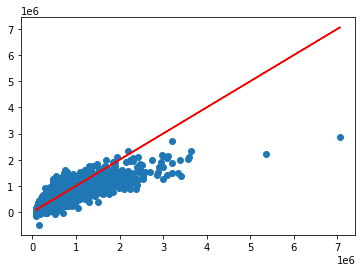

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred_lr1)
plt.plot(y_test,y_test,color='red')
plt.show()

### TASK - 3

In [67]:
from sklearn.ensemble import RandomForestRegressor 

In [68]:
rfr = RandomForestRegressor(n_estimators=200)

In [69]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [70]:
rfr.score(X_train,y_train)

0.9601558199260335

In [71]:
prev_rfr=rfr.predict(X_test)
prev_rfr

array([497212.155, 287148.045, 491479.545, ..., 372554.6  , 784079.03 ,
       372884.25 ])

In [72]:
print("R^2 Score :",metrics.r2_score(y_test,prev_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,prev_rfr))
print("Mean Squared Error :",mean_squared_error(y_test,prev_rfr))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,prev_rfr)))

R^2 Score : 0.712580498415431
Mean Absolute Error : 127771.70399873007
Mean Squared Error : 39551160864.66962
Mean Squared Root Error : 198874.7366174739


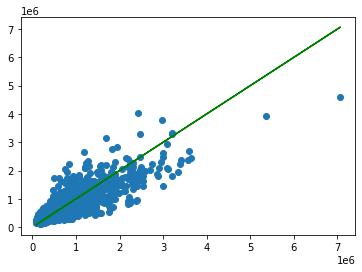

In [73]:
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='green')
plt.show()

In [74]:
from sklearn.ensemble import RandomForestRegressor
from numpy import  mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
results=list()
model = RandomForestRegressor(max_depth=3,random_state=2)
model.fit(X_train,y_train)
predict=model.predict(X_test)    
results.append(model.score(X_test,y_test))
print('F1 score : %.3f  (%.3f)' % (mean(results),std(results)))     

F1 score : 0.588  (0.000)


### TASK - 4 

Linear regression

In [75]:
preco_lr1 = df['price']
predict_lr1 = pd.Series(pred_lr1)
error_lr1 = preco_lr1-predict_lr1
data_lr1 = {'Price':preco_lr1,'Predictions':predict_lr1,'Error':error_lr1}         
data_prev_lr1 = pd.DataFrame(data_lr1) 
data_prev_lr1.head()

,Price,Predictions,Error
0,221900.0,384226.691377,-162326.691377
1,538000.0,187578.606361,350421.393639
2,180000.0,650856.856125,-470856.856125
3,604000.0,756782.209561,-152782.209561
4,510000.0,428318.974165,81681.025835


Random Forest 

In [76]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr.head()

,Price,Predictions,Error
0,221900.0,497212.155,-275312.155
1,538000.0,287148.045,250851.955
2,180000.0,491479.545,-311479.545
3,604000.0,566643.350,37356.650
4,510000.0,422568.250,87431.750


In [79]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("MSE :",mean_squared_error(y_test,y_pred))


MSE : 39747696267.53951


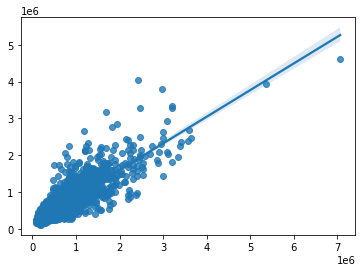

In [83]:
import seaborn as sns
sns.regplot(y_test,prev_rfr)
plt.show()